#How to get Fig.5

generate the figure of the learned representations of each module from KGE-UNIT

Read learned features of heterogeneous features, structural features, CNN-based encoder's output features and Task-aware attention decoder's ouput features

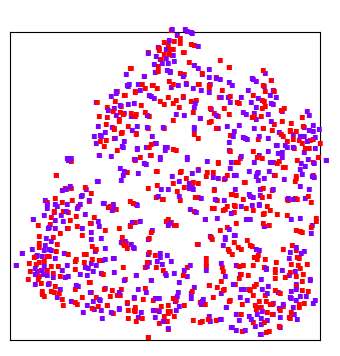

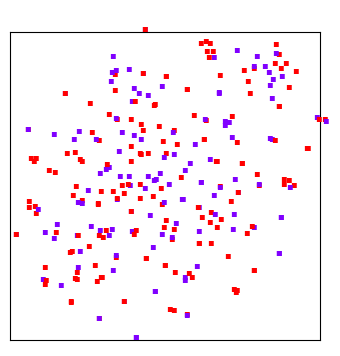

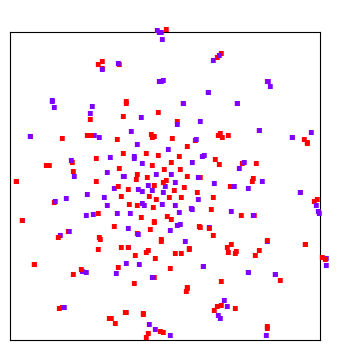

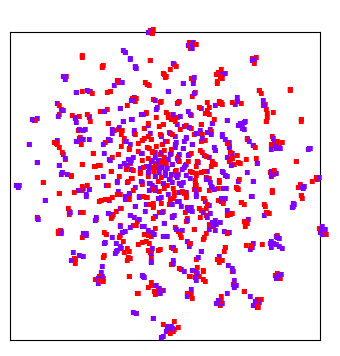

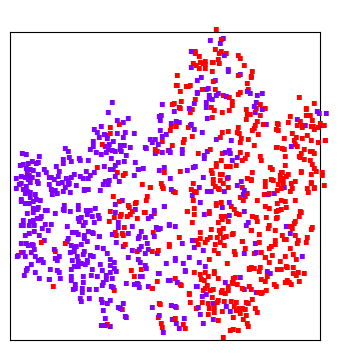

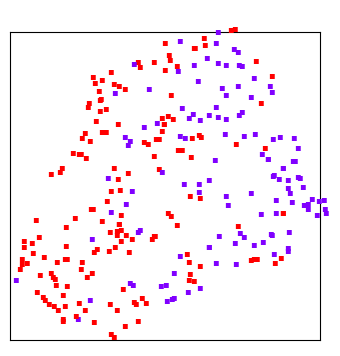

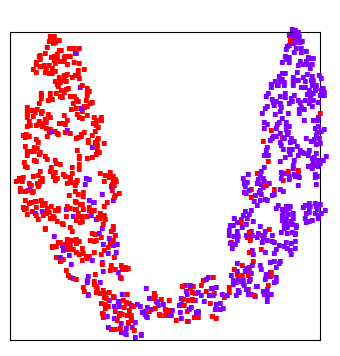

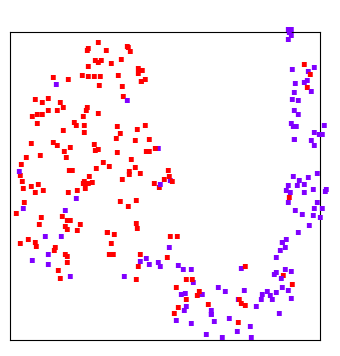

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

SRC_PATH= "../res/csv/"
###ReadFeatures
ddi_hf = np.array(pd.read_csv(os.path.join(SRC_PATH, 'ddi_hf.csv'), sep=',',header=None))
dti_hf = np.array(pd.read_csv(os.path.join(SRC_PATH, 'dti_hf.csv'), sep=',',header=None))
ddi_sf =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'ddi_sf.csv'), sep=',',header=None))
dti_sf =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'dti_sf.csv'), sep=',',header=None))
ddi_encoder =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'ddi_encoder.csv'), sep=',',header=None))
dti_encoder =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'dti_encoder.csv'), sep=',',header=None))
ddi_decoder =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'ddi.csv'), sep=',',header=None))
dti_decoder =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'dti.csv'), sep=',',header=None))

y_label_ddi =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'label_ddi.csv'), sep=',',header=None)).astype(int)
y_label_dti =  np.array(pd.read_csv(os.path.join(SRC_PATH, 'label_dti.csv'), sep=',',header=None)).astype(int)

y_label_ddi = y_label_ddi.squeeze()
y_label_dti = y_label_dti.squeeze()
##draw figures
def plot_embedding(data,label,title):
    x_min ,x_max = np.min(data,0),np.max(data,0)
    data = (data-x_min)/(x_max-x_min)
    fig = plt.figure(figsize=(4,4))
    colors = plt.cm.rainbow(np.linspace(0,1,2))
    for i in range(data.shape[0]):
        plt.text(data[i,0],data[i,1],'.',color= colors[label[i]],fontdict={'weight':'bold','size':20})
    plt.xticks([])
    plt.yticks([])
    plt.savefig(title,format='svg')
    return fig

##TSNE
tsne = TSNE(n_components=2)

x_hf_ddi = tsne.fit_transform(ddi_hf)
plot_embedding(x_hf_ddi,y_label_ddi,'test_ddi_hf.svg')

x_hf_dti = tsne.fit_transform(dti_hf)
plot_embedding(x_hf_dti,y_label_dti,'test_dti_hf.svg')
x_sf_ddi = tsne.fit_transform(ddi_sf)
plot_embedding(x_sf_ddi,y_label_ddi,'test_ddi_sf.svg') 
x_sf_dti = tsne.fit_transform(dti_sf)
plot_embedding(x_sf_dti,y_label_dti,'test_dti_sf.svg')    
x_ddi_b = tsne.fit_transform(ddi_encoder)
plot_embedding(x_ddi_b,y_label_ddi,'test_ddi_encoder.svg')    

x_dti_b = tsne.fit_transform(dti_encoder)
plot_embedding(x_dti_b[:286],y_label_dti,'test_dti_encoder.svg')

x_ddi = tsne.fit_transform(ddi_decoder)
plot_embedding(x_ddi,y_label_ddi,'test_ddi.svg')    

x_dti = tsne.fit_transform(dti_decoder)
plot_embedding(x_dti[:286],y_label_dti,'test_dti.svg') 